# Bank Marketing

This dataset consists of direct marketing campaigns by a Portuguese banking institution using phone calls. The campaigns aimed to sell subscriptions to a bank term deposit (see variable `y`).

**Data Dictionary**

| Column | Variable | Class |
| --- | --------------- | --- |
| age | age of customer | |
| job | type of job | categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown" |
| marital | marital status | categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed |
| education | highest degree of customer | categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown" |
| default | has credit in default? | categorical: "no","yes","unknown" |
| housing | has housing loan? | categorical: "no","yes","unknown" |
| loan | has personal loan? | categorical: "no","yes","unknown" |
| contact | contact communication type | categorical: "cellular","telephone" |
| month | last contact month of year | categorical: "jan", "feb", "mar", ..., "nov", "dec" | 
| day_of_week | last contact day of the week | categorical: "mon","tue","wed","thu","fri" |
| campaign | number of contacts performed during this campaign and for this client | numeric, includes last contact |
| pdays | number of days that passed by after the client was last contacted from a previous campaign | numeric; 999 means client was not previously contacted |
| previous | number of contacts performed before this campaign and for this client | numeric |
| poutcome | outcome of the previous marketing campaign | categorical: "failure","nonexistent","success" |
| emp.var.rate | employment variation rate - quarterly indicator | numeric |
| cons.price.idx | consumer price index - monthly indicator | numeric   | 
| cons.conf.idx | consumer confidence index - monthly indicator | numeric |   
| euribor3m | euribor 3 month rate - daily indicator | numeric |
| nr.employed | number of employees - quarterly indicator | numeric |
| y | has the client subscribed a term deposit? | binary: "yes","no" |

In [1]:
install.packages("correlationfunnel")

Installing correlationfunnel [0.2.0] ...
	OK [linked cache]


In [2]:
# import relevant libraries
library(tidyverse)
library(correlationfunnel)
library(ggrepel)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

══ Using correlationfunnel? ════════════════════════════════════════════════════
You might also be interested in applied data science training for business.
</> Learn more at - www.business-science.io </>



In [3]:
# import the data and view it
data <- read_delim("data/bank-marketing.csv", delim = ";", show_col_types = FALSE)
str(data)

spec_tbl_df [41,188 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age           : num [1:41188] 56 57 37 40 56 45 59 41 24 25 ...
 $ job           : chr [1:41188] "housemaid" "services" "services" "admin." ...
 $ marital       : chr [1:41188] "married" "married" "married" "married" ...
 $ education     : chr [1:41188] "basic.4y" "high.school" "high.school" "basic.6y" ...
 $ default       : chr [1:41188] "no" "unknown" "no" "no" ...
 $ housing       : chr [1:41188] "no" "no" "yes" "no" ...
 $ loan          : chr [1:41188] "no" "no" "no" "no" ...
 $ contact       : chr [1:41188] "telephone" "telephone" "telephone" "telephone" ...
 $ month         : chr [1:41188] "may" "may" "may" "may" ...
 $ day_of_week   : chr [1:41188] "mon" "mon" "mon" "mon" ...
 $ duration      : num [1:41188] 261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : num [1:41188] 1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : num [1:41188] 999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : num [1:411

In [4]:
summary(data)

      age            job              marital           education        
 Min.   :17.00   Length:41188       Length:41188       Length:41188      
 1st Qu.:32.00   Class :character   Class :character   Class :character  
 Median :38.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.02                                                           
 3rd Qu.:47.00                                                           
 Max.   :98.00                                                           
   default            housing              loan             contact         
 Length:41188       Length:41188       Length:41188       Length:41188      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

Rather than going through a full analysis at this point in time, the purpose was just to have a play with the `correlationfunnel` package functionality. According to the documentation, the intention behind this package is to help speed up an Exploratory Data Analysis by making it very easy to identify which features are more important to the target variable and hence should be the focus of any business insights and/or predictive/explanatory model development.

## Step 1: Prepare data as binary features

In more detail, numeric features are binned to create categorical features before all features are in the dataset are one-hot encoded to produce a set of binary features. The `thresh_infreq` and `name_infreq` are used to prevent the dimensionality of the resulting dataframe from growing beyond usefullness when there are low frequency/high cardinality categories present in the data.

In [5]:
# first identify whether or not there are any missing values
colSums(is.na(data))

age            job        marital      education        default 
             0              0              0              0              0 
       housing           loan        contact          month    day_of_week 
             0              0              0              0              0 
      duration       campaign          pdays       previous       poutcome 
             0              0              0              0              0 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
             0              0              0              0              0 
             y 
             0

In [6]:
binarised_data <- data %>% binarize(n_bins = 5, thresh_infreq = 0.01, name_infreq = "OTHER", one_hot = TRUE)
glimpse(binarised_data)

Rows: 41,188
Columns: 99
$ `age__-Inf_31`                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, …
$ age__31_35                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ age__35_41                     <dbl> 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, …
$ age__41_49                     <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ age__49_Inf                    <dbl> 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, …
$ job__admin.                    <dbl> 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, …
$ `job__blue-collar`             <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, …
$ job__entrepreneur              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ job__housemaid                 <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ job__management                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ job__retired                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ `job__self-employed`           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ job__services

Note how the number of columns/features in the dataframe increased by a factor of five from 21 to 99.

## Step 2: Correlate to the target

In [7]:
# calculating the correlation with clients subscribing to a term deposit 
corr_df <- binarised_data %>% correlate(y__yes)
head(corr_df, 10)

feature,bin,correlation
<fct>,<chr>,<dbl>
y,no,-1.0000000
y,yes,1.0000000
duration,368_Inf,0.3432603
pdays,999,-0.3248767
poutcome,success,0.3162694
euribor3m,-Inf_1.299,0.2995834
nr.employed,-Inf_5099.1,0.2912727
emp.var.rate,-Inf_-1.8,0.2082601
previous,0,-0.1935068


## Step 3: Plot the correlation funnel

A correlation funnel is a tornado plot that lists the most correlated features (based on absolute magnitude) at the top and the least correlated features at the bottom. Hence, the resulting visualisation looks like a funnel.

Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


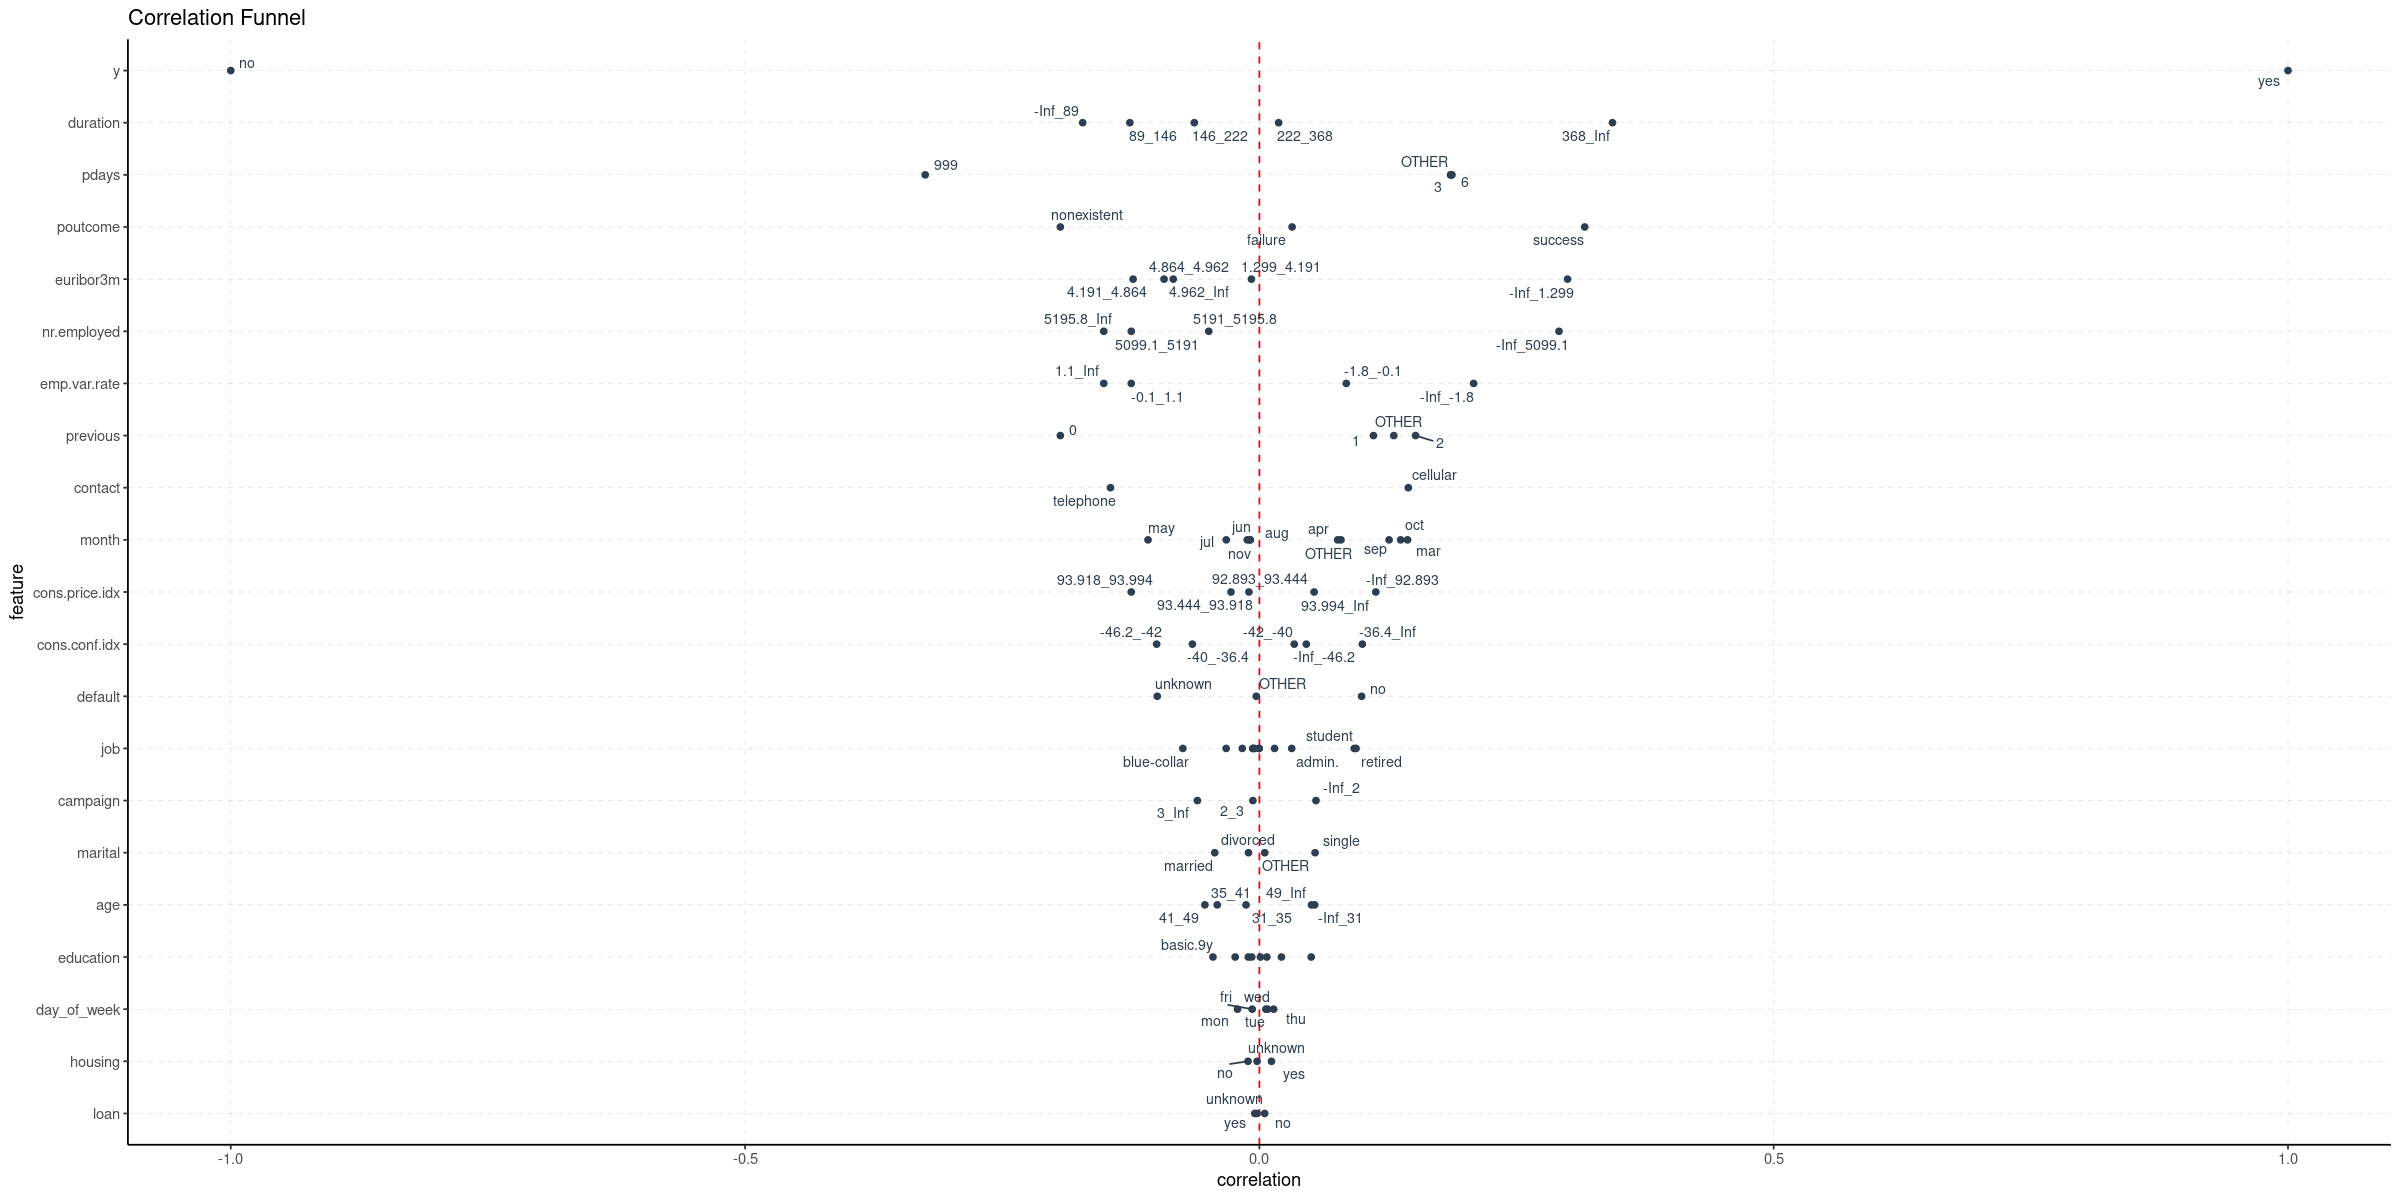

In [26]:
options(repr.plot.width = 20, repr.plot.height = 10)
corr_df %>% 
    plot_correlation_funnel(interactive = FALSE) + 
        theme_classic() +
        theme(panel.grid.major = element_line(color = "grey",
                                        size = 0.1,
                                        linetype = 2))
# setting interactive = TRUE produces a plotly rather than ggplot visualisation

From this, it's easy to see that the features most strongly correlated with taking out a term deposit are:
- a duration of *368 or longer*
- *being contacted* at any point after a previous campaign
- the outcome of a previous campaign being deemed a *success*
- the euribor three month rate being *no higher than 1.29%*
- the number of employees being *no more than 5,099*, and
- the employment variation rate being *no more than -1.8%*.

On the other hand, features most strongly correlation with a client **not** taking out a term deposit are:
- a duration of *no more than 89*
- *not being contacted* after a previous campaign
- the outcome of a previous campaign being deemed *non-existant*
- there having been *no contact* before this campaign for the client, and
- the contact communication type being *telephone* rather than cellular.

It seems, therefore, that three simple actions to encourage more clients to take out a term deposit could include:
- offering more long-term products (I'm assuming that it's what's meant by duration, as an explanation of that feature was missing from the data dictionary),
- ensuring that clients are contacted after the previous campaign,
- ensuring that where possible, clients are contacted by cellular rather than telephone.